In [1]:
cd /home/roberto/Desktop/romain_ic/wavemixing_project/py

/home/roberto/Desktop/romain_ic/wavemixing_project/py


In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("../plots"))
sys.path.insert(0, os.path.abspath("../hamiltonean_builder"))
sys.path.insert(0, os.path.abspath("../correlation"))
sys.path.insert(0, os.path.abspath("../single_and_double_excitations_subspace"))

In [3]:
from qutip import *
import matplotlib.pyplot as plt

from hamiltonean_builder.hamiltonean_builder import *
from helper_functions.operators import *
from plots.multi_plots import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from post_processing.local_calculations import *


In [4]:
def column(matrix, i, triD = False, j = 0):
    if triD != False:
        z_column = np.zeros(len(matrix))
        for z in range(len(matrix)):
            z_column[z] = matrix[z][i][j]
        return z_column  
    
    return [row[i] for row in matrix]

In [5]:
ind = 7
g2_zero_exact = np.load(f"./benchmarking/0.1_bench/S_exact_pos{ind}.npy", allow_pickle=True)
g2_zero_approximated = np.load(f"./benchmarking/0.1_bench/aproximated_pos{ind}.npy", allow_pickle=True)
V_g2_zero_exact = np.load(f"./benchmarking/0.1_bench/V_exact_pos{ind}.npy", allow_pickle=True)
ang2 = np.linspace(0,360, len(g2_zero_exact))

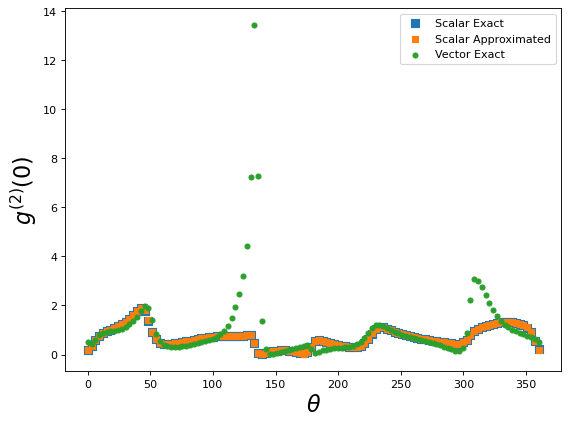

In [33]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(ang2, g2_zero_exact,label = "Scalar Exact", marker =  "s", s = 40)
plt.scatter(ang2, g2_zero_approximated, label = "Scalar Approximated", marker =  "s", s = 25)
plt.scatter(ang2, V_g2_zero_exact, label = "Vector Exact", marker =  "o", s = 20)


plt.xlabel(r"$\theta$", size = 20)
plt.ylabel(r"$g^{(2)}(0)$", size = 20)
#plt.scatter([25],[2], marker =  "*", label = "Recife (Same direction)")
#plt.scatter([220],[1], marker =  "*", label = "Recife (Opposite direction)")
plt.legend()
plt.savefig(f"./benchmarking/V_benchmarking_N6_b0_0.1_Omega0.05Delta0_pos{ind}.jpg")